# Data Cleaning

In [1]:
# Data cleaning for COVID data

import pandas as pd

# Load the dataset
df = pd.read_csv('COVID19 cases.csv')

# Remove duplicate records
df = df.drop_duplicates()

# Only retain rows where 'Classification' is 'CONFIRMED'
df = df[df['Classification'] == 'CONFIRMED']

# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values (fill with 'Unknown')
df = df.fillna('Unknown')

# Convert date columns to datetime format
df['Episode Date'] = pd.to_datetime(df['Episode Date'])
df['Reported Date'] = pd.to_datetime(df['Reported Date'])

# Ensure categorical data consistency (to uppercase)
df['Client Gender'] = df['Client Gender'].str.upper()

# Check the cleaned dataset
print("\nMissing values after handling:")
print(df.isnull().sum())
print("\nCleaned dataset:")
print(df.head())

# Output the cleaned dataset to a new CSV file
df.to_csv('COVID19_cases_confirmed_cleaned.csv', index=False)


Missing values before handling:
_id                        0
Assigned_ID                0
Outbreak Associated        0
Age Group                138
Neighbourhood Name     12481
FSA                     7247
Source of Infection        0
Classification             0
Episode Date               0
Reported Date              0
Client Gender              0
Outcome                    0
Ever Hospitalized          0
Ever in ICU                0
Ever Intubated             0
dtype: int64

Missing values after handling:
_id                    0
Assigned_ID            0
Outbreak Associated    0
Age Group              0
Neighbourhood Name     0
FSA                    0
Source of Infection    0
Classification         0
Episode Date           0
Reported Date          0
Client Gender          0
Outcome                0
Ever Hospitalized      0
Ever in ICU            0
Ever Intubated         0
dtype: int64

Cleaned dataset:
   _id  Assigned_ID Outbreak Associated       Age Group  \
0    1            1    

In [ ]:
# for compare differnece only


import pandas as pd

# Load the datasets
confirmed_cases_df = pd.read_csv('COVID19_cases_confirmed_cleaned.csv')
neighborhood_profile_df = pd.read_excel('neighborhood profile.xlsx')

# Get the unique neighbourhood names from both datasets
neighbourhoods_confirmed_cases = set(confirmed_cases_df['Neighbourhood Name'].unique())
neighbourhoods_covid = set(neighborhood_profile_df['Neighbourhood Name'].unique())

# Find the differences between the sets
missing_in_confirmed_cases = neighbourhoods_covid - neighbourhoods_confirmed_cases
missing_in_covid = neighbourhoods_confirmed_cases - neighbourhoods_covid

# Print the results
print("Neighbourhoods in neighborhood profile.csv but not in confirmed_cases_per_neighborhood.csv:")
print(missing_in_confirmed_cases)
print("\nNeighbourhoods in confirmed_cases_per_neighborhood.csv but not in neighborhood profile.csv:")
print(missing_in_covid)


Neighbourhoods in neighborhood profile.csv but not in confirmed_cases_per_neighborhood.csv:
{'Weston-Pelham Park', 'Downtown Yonge East', 'Golfdale-Cedarbrae-Woburn', 'Humber Bay Shores', 'St Lawrence-East Bayfront-The Islands', 'South Eglinton-Davisville', 'West Queen West', 'West Rouge', 'Mimico-Queensway', 'Wellington Place', 'Woburn North', "L'Amoreaux West", 'Avondale', 'Taylor Massey', 'Fort York-Liberty Village', 'Bay-Cloverhill', "East L'Amoreaux", 'O`Connor Parkview', 'Bendale South', 'Morningside Heights', 'Yonge-St. Clair', 'East Willowdale', "Parkwoods-O'Connor Hills", 'Dovercourt Village', 'Yonge-Doris', 'Etobicoke City Centre', 'Malvern West', 'Oakdale-Beverley Heights', 'Islington', 'Church-Wellesley', 'Junction-Wallace Emerson', 'Briar Hill-Belgravia', 'Yonge-Bay Corridor', 'Malvern East', 'North Toronto', 'Downsview', 'Bendale-Glen Andrew', 'Harbourfront-CityPlace', 'East End Danforth', 'Fenside-Parkwoods'}

Neighbourhoods in confirmed_cases_per_neighborhood.csv but no

In [ ]:
# counted covid cases per neighbourhood and merge with neighborhood profile file


import pandas as pd

# Load the cleaned COVID-19 dataset
covid_df = pd.read_csv('COVID19_cases_confirmed_cleaned.csv')
covid_df['Episode Date'] = pd.to_datetime(covid_df['Episode Date'])
covid_2021 = covid_df[covid_df['Episode Date'].dt.year == 2021]

# Load the neighborhood profile dataset
neighborhood_profile_df = pd.read_excel('reorganized neighborhood profile.xlsx')

# deal with inconsitency in neighborhood names
covid_2021['Neighbourhood Name'] = covid_2021['Neighbourhood Name'].replace({
    'Weston-Pellam Park': 'Weston-Pelham Park',
    'Briar Hill - Belgravia': 'Briar Hill-Belgravia',
    'East End-Danforth': 'East End Danforth'})
neighborhood_profile_df['Neighbourhood Name'] = neighborhood_profile_df['Neighbourhood Name'].replace({
    'Yonge-St. Clair': 'Yonge-St.Clair',
    'O`Connor Parkview': "O'Connor-Parkview",
    'Taylor Massey': 'Taylor-Massey'})
# Calculate the number of confirmed cases per neighbourhood in 2020
cases_per_neighborhood = covid_2021.groupby('Neighbourhood Name').size().reset_index(name='Confirmed Cases')


# Merge the confirmed cases data with the neighborhood profile data
merged_df = pd.merge(neighborhood_profile_df, cases_per_neighborhood, on='Neighbourhood Name', how='left')

# Fill NaN values in the 'Confirmed Cases' column with 0
merged_df['Confirmed Cases'] = merged_df['Confirmed Cases'].fillna(0)

merged_df['Infection Rate'] = merged_df['Confirmed Cases']/merged_df['Population']

# Save the merged data to a new csv file
merged_df.to_csv('updated_neighborhood_profile.csv', index=False)

# Display the merged dataframe
print(merged_df)


               Neighbourhood Name  Population  Median Income per Person  \
0                 Agincourt North       27540              30000.000000   
1    Agincourt South-Malvern West       24170              32000.000000   
2                       Alderwood       12595              45200.000000   
3                           Annex       29300              51600.000000   
4               Banbury-Don Mills       27155              46400.000000   
..                            ...         ...                       ...   
135          Downsview-Roding-CFB       39390              35600.000000   
136    Islington-City Centre West       47060              45800.000000   
137           Mount Pleasant West       38620              49200.000000   
138                       Niagara       33085              65000.000000   
139               Willowdale East       49435              39866.666667   

     Employment rate  Proportion of people with a Bachelor’s degree or higher  \
0          45.0000

<ipython-input-2-b03e8a4adc69>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_2020['Neighbourhood Name'] = covid_2020['Neighbourhood Name'].replace({


# Descriptive Analysis

In [3]:
## Descriptive Analysis -- Target Variable

import pandas as pd

df = pd.read_csv('01coded_data.csv')
df.head()

# Frequency Table for shleter
freq_table = df['COVID-19 response shelter'].value_counts(normalize=True)
count_table = df['COVID-19 response shelter'].value_counts()

combined_table = pd.concat([count_table, freq_table], axis=1)
combined_table.columns = ['Count', 'Percentage']

print("Social Support Frequency Table:")
print(combined_table)

# Frequency Table for clinics
freq_table = df['If Immunization Clinics'].value_counts(normalize=True)
count_table = df['If Immunization Clinics'].value_counts()

combined_table = pd.concat([count_table, freq_table], axis=1)
combined_table.columns = ['Count', 'Percentage']

print("Medical Support Frequency Table:")
print(combined_table)

# Frequency Table for combined variable
freq_table = df['IFS'].value_counts(normalize=True)
count_table = df['IFS'].value_counts()

combined_table = pd.concat([count_table, freq_table], axis=1)
combined_table.columns = ['Count', 'Percentage']

print("Combined Frequency Table:")
print(combined_table)

Social Support Frequency Table:
   Count  Percentage
0    122    0.871429
1     18    0.128571
Medical Support Frequency Table:
   Count  Percentage
1    128    0.914286
0     12    0.085714
Combined Frequency Table:
   Count  Percentage
1    111    0.792857
2     18    0.128571
0     11    0.078571


In [4]:
## Descriptive Analysis -- Describe numerical variables
X = df[['Proportion of people with a Bachelors degree or higher','Population Density','Median Income per Person', 'Employment rate', 'Median age of the population', 'Average household size', 'Infection Rate']]
description = X.describe()
description

,Proportion of people with a Bachelors degree or higher,Population Density,Median Income per Person,Employment rate,Median age of the population,Average household size,Infection Rate
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.347160,0.626770,41840.476190,0.545047,40.920952,2.478929,0.061881
std,0.132721,0.521928,10160.322183,0.063016,3.870069,0.375321,0.017925
min,0.096713,0.101110,28400.000000,0.402000,30.400000,1.550000,0.031885
25%,0.241785,0.344397,34000.000000,0.502000,38.800000,2.237500,0.048562
50%,0.337578,0.501785,38600.000000,0.537000,40.600000,2.500000,0.059507
75%,0.446291,0.742614,46400.000000,0.592500,43.200000,2.700000,0.074600
max,0.673323,4.367895,74500.000000,0.775000,50.800000,3.350000,0.114881


Statistical Summary of Median Income per Person:
count      140.000000
mean     41840.476190
std      10160.322183
min      28400.000000
25%      34000.000000
50%      38600.000000
75%      46400.000000
max      74500.000000
Name: Median Income per Person, dtype: float64


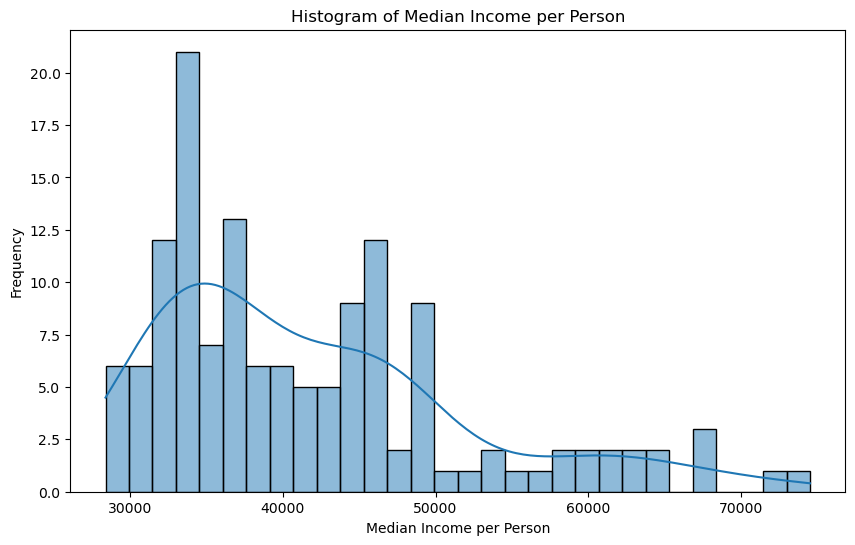

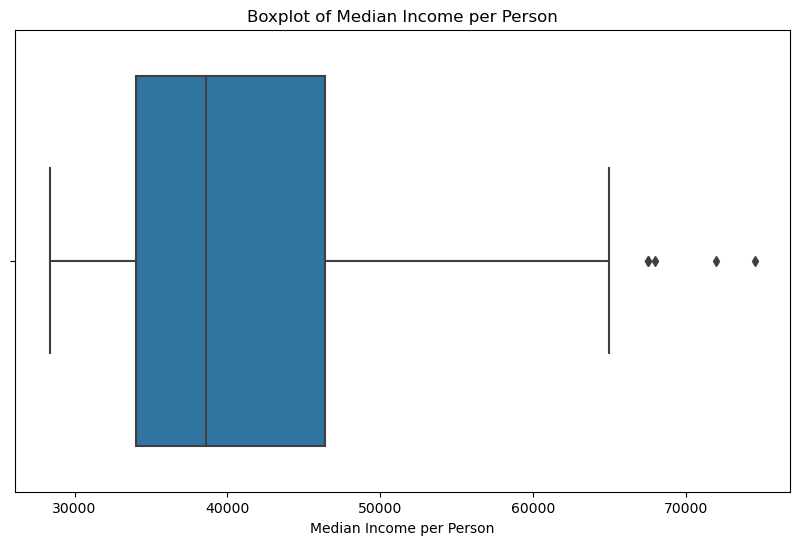

Number of outliers: 5
Outliers:
16     72000.0
64     74500.0
68     68000.0
69     67500.0
104    67500.0
Name: Median Income per Person, dtype: float64

Statistical Summary of Proportion of people with a Bachelors degree or higher:
count    140.000000
mean       0.347160
std        0.132721
min        0.096713
25%        0.241785
50%        0.337578
75%        0.446291
max        0.673323
Name: Proportion of people with a Bachelors degree or higher, dtype: float64


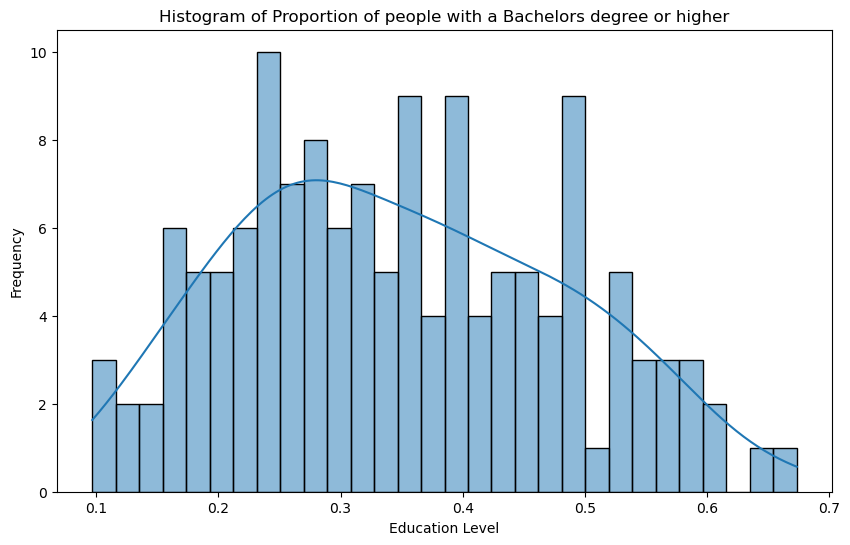

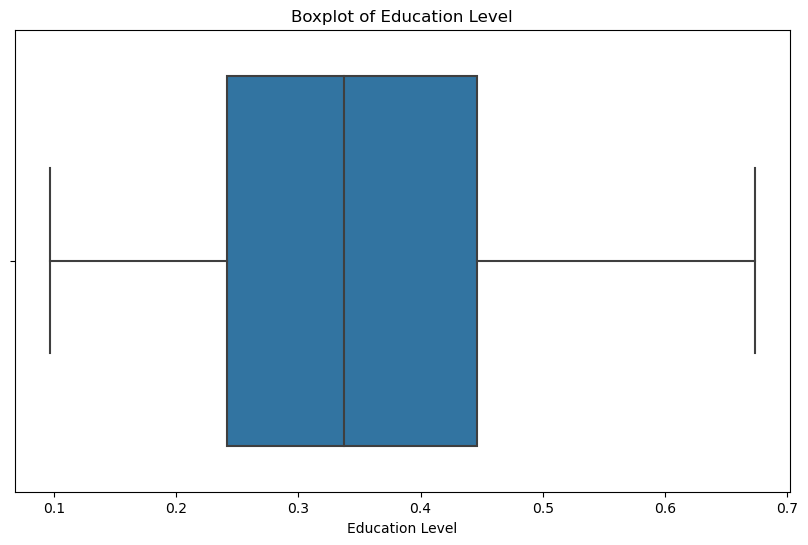

Number of outliers for Education Level: 0

Statistical Summary of Median age of the population:
count    140.000000
mean      40.920952
std        3.870069
min       30.400000
25%       38.800000
50%       40.600000
75%       43.200000
max       50.800000
Name: Median age of the population, dtype: float64


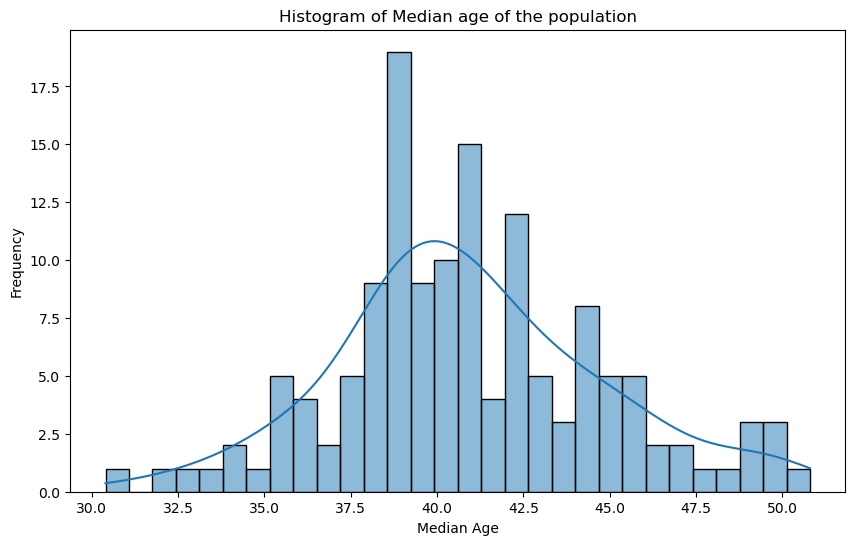

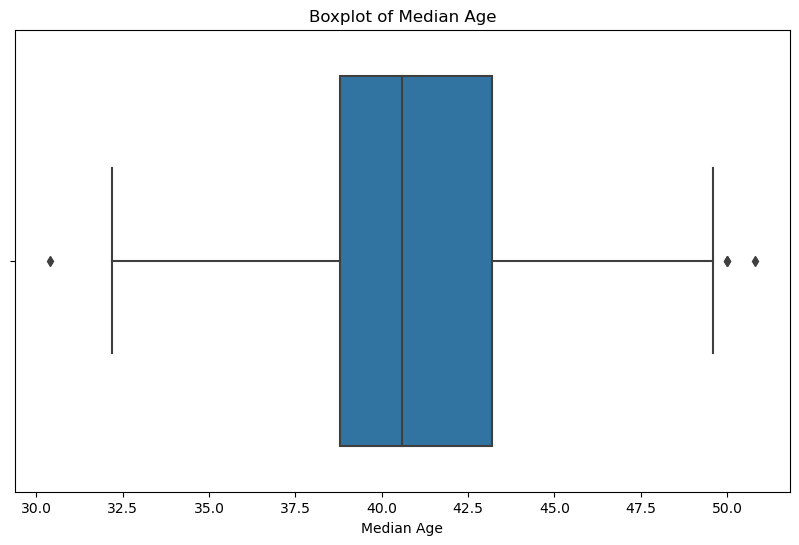

Number of outliers for Median Age: 4
6      30.4
8      50.0
75     50.8
104    50.0
Name: Median age of the population, dtype: float64

Statistical Summary of Population Density:
count    140.000000
mean       0.626770
std        0.521928
min        0.101110
25%        0.344397
50%        0.501785
75%        0.742614
max        4.367895
Name: Population Density, dtype: float64


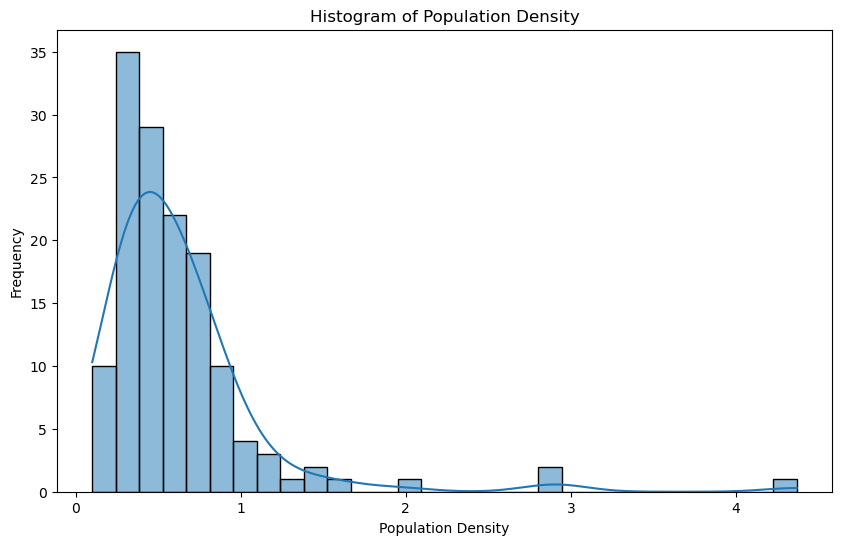

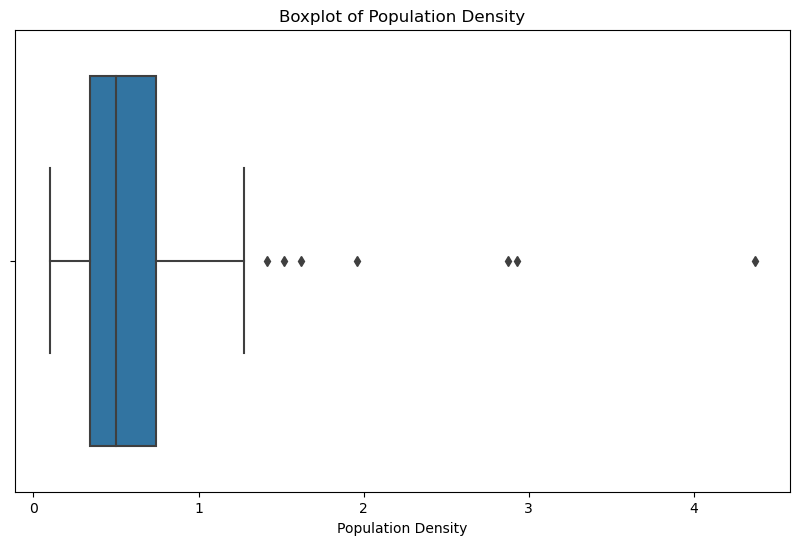

Number of outliers for Population Density: 7
6      1.619643
23     2.931708
79     1.520279
83     2.874042
89     4.367895
100    1.959973
115    1.413061
Name: Population Density, dtype: float64


In [5]:
## Descriptive Analysis -- Predictor Variable

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('01coded_data.csv')

# 'Median Income per person'
summary = df['Median Income per Person'].describe()
print("Statistical Summary of Median Income per Person:")
print(summary)

plt.figure(figsize=(10, 6))
sns.histplot(df['Median Income per Person'], kde=True, bins=30)
plt.title('Histogram of Median Income per Person')
plt.xlabel('Median Income per Person')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Median Income per Person'])
plt.title('Boxplot of Median Income per Person')
plt.xlabel('Median Income per Person')
plt.show()

Q1 = df['Median Income per Person'].quantile(0.25)
Q3 = df['Median Income per Person'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Median Income per Person'] < lower_bound) | (df['Median Income per Person'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
if len(outliers) > 0:
    print("Outliers:")
    print(outliers['Median Income per Person'])


# 'Education Level'
factor = 'Proportion of people with a Bachelors degree or higher'
print(f"\nStatistical Summary of {factor}:")
summary = df[factor].describe()
print(summary)

plt.figure(figsize=(10, 6))
sns.histplot(df[factor], kde=True, bins=30)
plt.title(f'Histogram of {factor}')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df[factor])
plt.title(f'Boxplot of Education Level')
plt.xlabel('Education Level')
plt.show()

Q1 = df[factor].quantile(0.25)
Q3 = df[factor].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[factor] < (Q1 - 1.5 * IQR)) | (df[factor] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers for Education Level: {len(outliers)}")
if len(outliers) > 0:
    print(outliers[factor])

# 'Median Age of the Population'
factor = 'Median age of the population'
print(f"\nStatistical Summary of {factor}:")
summary = df[factor].describe()
print(summary)

plt.figure(figsize=(10, 6))
sns.histplot(df[factor], kde=True, bins=30)
plt.title(f'Histogram of {factor}')
plt.xlabel('Median Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df[factor])
plt.title(f'Boxplot of Median Age')
plt.xlabel('Median Age')
plt.show()

Q1 = df[factor].quantile(0.25)
Q3 = df[factor].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[factor] < (Q1 - 1.5 * IQR)) | (df[factor] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers for Median Age: {len(outliers)}")
if len(outliers) > 0:
    print(outliers[factor])

# 'Population Density'
factor = 'Population Density'
print(f"\nStatistical Summary of {factor}:")
summary = df[factor].describe()
print(summary)

plt.figure(figsize=(10, 6))
sns.histplot(df[factor], kde=True, bins=30)
plt.title(f'Histogram of {factor}')
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df[factor])
plt.title(f'Boxplot of Population Density')
plt.xlabel('Population Density')
plt.show()

Q1 = df[factor].quantile(0.25)
Q3 = df[factor].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[factor] < (Q1 - 1.5 * IQR)) | (df[factor] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers for Population Density: {len(outliers)}")
if len(outliers) > 0:
    print(outliers[factor])


# Modelling

In [ ]:
! pip install ISLP

In [ ]:
## Modeling & model selection
import pandas as pd
from ISLP import confusion_table
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# Split the data into features (X) and target (y)
X = df[['Proportion of people with a Bachelors degree or higher','Population Density','Median Income per Person', 'Employment rate', 'Median age of the population', 'Average household size', 'Infection Rate']]
y = df['IFS']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Z-score normalization (standardization)
scaler_std = StandardScaler()
X_train = scaler_std.fit_transform(X_train)
X_test = scaler_std.transform(X_test)



# Initialize variables to store results
best_k = None
best_accuracy = 0

# Loop through different values of k
for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, knn_pred)
    print(f'K={k}: Accuracy: {accuracy:.1%}')

    # Update best k based on accuracy
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f'Best K: {best_k}, Best Accuracy: {best_accuracy:.1%}')

# Define the models in a dictionary
models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=best_k),
    "SVC": SVC(kernel='linear'),  # Maximum Margin Classifier
    "SVM": SVC(kernel='rbf'),  # SVM with RBF kernel
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Bagging": BaggingClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier()
}

# Dictionary to store accuracy scores
accuracy_scores = {}

# Iterate over the models, train, and evaluate them
for name, model in models.items():
    # Creating a pipeline that first preprocesses the data, then applies the model
    pipeline = Pipeline(steps=[('model', model)])
    # Fitting the model
    pipeline.fit(X_train, y_train)
    # Making predictions and evaluating
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

# Display the accuracy scores
for model, score in accuracy_scores.items():
    print(f"{model}: {score:.4f}")



# Perform KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
knn_pred = knn.fit(X_train, y_train).predict(X_test)
knn_confusion_table = confusion_table(knn_pred, y_test)
print("KNN Confusion Table:")
print(knn_confusion_table)

# Perform SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_confusion_table = confusion_table(svm_pred, y_test)
print("SVM Confusion Table:")
print(svm_confusion_table)


K=1: Accuracy: 66.7%
K=2: Accuracy: 76.2%
K=3: Accuracy: 76.2%
K=4: Accuracy: 83.3%
K=5: Accuracy: 83.3%
Best K: 4, Best Accuracy: 83.3%


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LDA: 0.7619
QDA: 0.7619
Naive Bayes: 0.7143
KNN: 0.8333
SVC: 0.7619
SVM: 0.8333
Random Forest: 0.7381
Bagging: 0.7143
Decision Tree: 0.6190
KNN Confusion Table:
Truth      0   1  2
Predicted          
0          0   0  0
1          5  35  2
2          0   0  0
SVM Confusion Table:
Truth      0   1  2
Predicted          
0          0   0  0
1          5  35  2
2          0   0  0


# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the 10-fold cross-validation setup
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Dictionary to hold the scores
model_scores = {}

# Perform 10-fold cross-validation for each model and store the mean score
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv)
    model_scores[model_name] = np.mean(scores)

print("Cross-validation scores:")
for model_name, score in model_scores.items():
    print(f"{model_name}: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

Cross-validation scores:
LDA: 0.7967
QDA: 0.8178
Naive Bayes: 0.7878
KNN: 0.7778
SVC: 0.7967
SVM: 0.7778
Random Forest: 0.7967
Bagging: 0.7567
Decision Tree: 0.6522
